# 8-4-Enrichment-Analysis-R
Jakke Neiro$^1$

1. Aboobaker laboratory, Department of Zoology, University of Oxford

FPR_unbound_coe, FPR_bound_coe, TPR_unbound_coe, TPR_bound_coe

# ROC analysis

## ROC data

In [239]:
coe = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")

In [240]:
coe_roc = data.frame("FPR" = c(coe$coe[1], coe$coe[2]), "TPR" = c(coe$coe[3], coe$coe[4]), "Color" = c("unbound", "bound"))

In [241]:
foxd = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/ROC.csv")

In [242]:
foxd_roc = data.frame("FPR" = c(foxd$fox[1], foxd$fox[2]), "TPR" = c(foxd$fox[3], foxd$fox[4]), "Color" = c("unbound", "bound"))

In [243]:
pax5 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/ROC.csv")

In [244]:
pax5_roc = data.frame("FPR" = c(pax5$pax5[1], pax5$pax5[2]), "TPR" = c(pax5$pax5[3], pax5$pax5[4]), "Color" = c("unbound", "bound"))

In [245]:
roc_summary = rbind(coe_roc, foxd_roc, pax5_roc)

In [246]:
roc_summary$Class = NA
roc_summary$Size = "small"

In [247]:
model <- lm(TPR ~ poly(FPR,2), data=roc_summary)

In [248]:
predict_data = data.frame("FPR" = seq(0,1,0.01))

In [249]:
model.predict = predict(model, predict_data)
model.predict = as.data.frame(model.predict)
model.predict$FPR = seq(0,1,0.01)
model.predict$Color = "Predicted"
model.predict$Class = "Predicted"
model.predict$Size = "big"

In [250]:
model.dataframe = data.frame("FPR" = model.predict$FPR, "TPR" = model.predict$model.predict, "Color" = model.predict$Color, "Class" = model.predict$Class, "Size"=model.predict$Size)

In [251]:
roc_summary_final  = rbind(roc_summary, model.dataframe)

## ROC Curve

In [252]:
library(ggplot2)

Warning message:
“Removed 11 rows containing missing values (geom_point).”


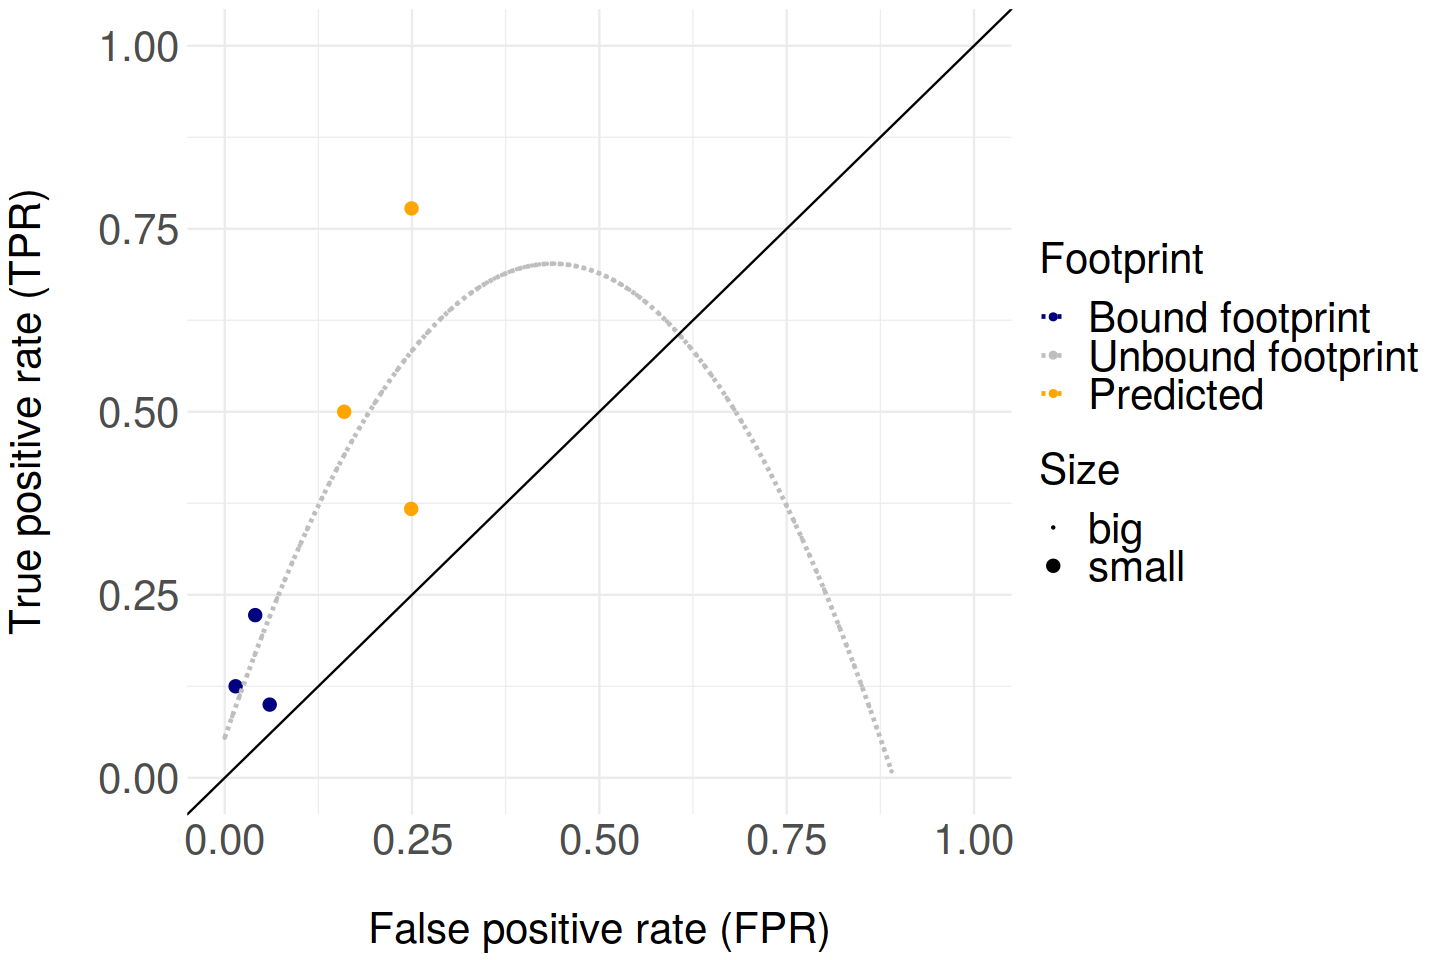

In [253]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)
p = ggplot(roc_summary_final) + geom_point(aes(x=FPR, y=TPR, col=Color, size=Size))+geom_line(aes(x=FPR, y=TPR, col=Class), na.rm = TRUE, linetype="dashed", size=1)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + geom_abline(intercept = 0, slope = 1, col="black")+xlim(0,1)+ylim(0,1)
p = p + xlab("\nFalse positive rate (FPR)") + ylab("True positive rate (TPR)\n")
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "grey", "orange"), labels=c("Bound footprint", "Unbound footprint", "Predicted"), na.translate = FALSE)
#p = p + scale_colour_manual(breaks = c("6", "4"),values=c("blue", "green"))
p = p + scale_size_manual(values=c(0.2, 3))
p

# Enrichment